<div style="text-align: center; font-weight: lighter;">
  <div>TTK4111 Reguleringsteknikk</div>
  <div>Institutt for Teknisk Kybernetikk</div>
  <div>NTNU</div>
  
  <h1>Øving 5</h1>
</div>

## Oppgave 1 a)

$$
u_{h} = F_{1} + F_{2} - M g \\
u_{v} = F_{1} + F_{2}
$$

In [1]:
import sympy as sp

u_h, F_1, F_2, M, g, u_v = sp.symbols(R'u_{h} F_{1} F_{2} M g u_{v}')

eq3a = sp.Eq(u_h, F_1 + F_2 - M * g)
eq3b = sp.Eq(u_v, F_1 - F_2)

F_1_expr = eq3a.subs(F_2, sp.solve(eq3b, F_2)[0])
F_1_expr = sp.solve(F_1_expr, F_1)[0].factor()
display(sp.Eq(F_1, F_1_expr))

F_2_expr = eq3a.subs(F_1, sp.solve(eq3b, F_1)[0])
F_2_expr = sp.solve(F_2_expr, F_2)[0].factor()
display(sp.Eq(F_2, F_2_expr))

Eq(F_{1}, (M*g + u_{h} + u_{v})/2)

Eq(F_{2}, (M*g + u_{h} - u_{v})/2)

<div style="text-align: center;">
    <img src="images/oppgave_1a.png" alt="Oppgave 1a png">
</div>

## Oppgave 1 b)

<div style="text-align: center; background-color: white;">
    <img src="images/oppgave_1b.svg" alt="Oppgave 1b SVG">
</div>

## Oppgave 1 c)

<div style="text-align: center; background-color: white;">
    <img src="images/oppgave_1c.svg" alt="Oppgave 1c SVG">
</div>

In [2]:
import sympy as sp

# Define the symbols
s, hat_p, g, vartheta, hat_h, M, u_h, J, ell, u_vartheta = sp.symbols(
    R's \hat{p} g \vartheta \hat{h} M u_{h} J \ell u_{\vartheta}')

# Define the equations using sympy
eq4a = sp.Eq(s**2 * hat_p, g * vartheta)
eq4b = sp.Eq(s**2 * hat_h, (1 / M) * u_h)
eq4c = sp.Eq(s**2 * vartheta, (1 / J) * ell * u_vartheta)

## Oppgave 2 a)

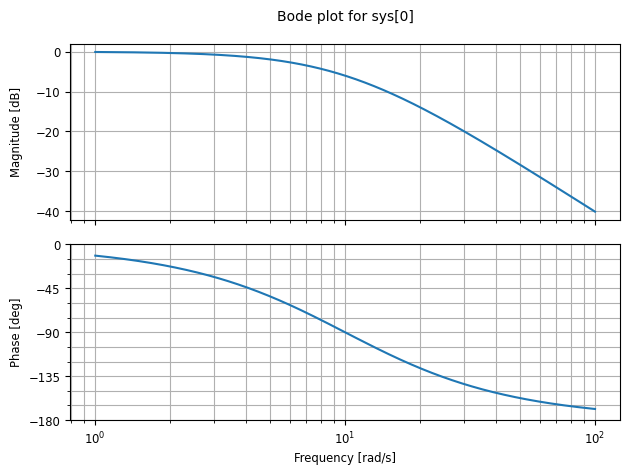

In [3]:
import control as ctrl
import matplotlib.pyplot as plt

omega_0 = 10

num = [omega_0**2]
den = [1, 2*omega_0, omega_0**2]

sys = ctrl.TransferFunction(num, den)

ctrl.bode_plot(sys, dB=True)

plt.show()

Basert på Bode-plottet, kan vi bekrefte at antagelsen $\vartheta_{\text{ref}} \approx \vartheta$ er gyldig under vanlig manøvrering. Dette skyldes god fasemargin og en amplitude på 0 ved lave frekvenser.

## Oppgave 2 b)

In [4]:
import sympy as sp

vartheta_ref, vartheta, omega_0, s, u_vartheta, F_s, K_s = sp.symbols(
    R'\vartheta_{ref} \vartheta \omega_{0} s u_{\vartheta} \mathrm{F}(s) \mathrm{K}(s)'
)

omega_0_val = 10

eq6 = sp.Eq(vartheta, (omega_0**2) / ((s + omega_0)**2) * vartheta_ref)
eq7 = sp.Eq(u_vartheta, F_s * vartheta_ref - K_s * vartheta)


eq4c_expr = eq4c.subs(u_vartheta, sp.solve(eq7, u_vartheta)[0])
eq4c_expr = sp.solve(eq4c_expr, vartheta)[0]
display(sp.Eq(vartheta, eq4c_expr))

F_s_expr = sp.solve(sp.Eq(sp.numer(eq4c_expr), sp.numer(eq6.rhs)), F_s)[0]
display(sp.Eq(F_s, F_s_expr))

K_s_expr = sp.solve(sp.Eq(sp.denom(eq4c_expr), sp.denom(eq6.rhs)), K_s)[0].expand()
display(sp.Eq(K_s, K_s_expr))

Eq(\vartheta, \ell*\mathrm{F}(s)*\vartheta_{ref}/(J*s**2 + \ell*\mathrm{K}(s)))

Eq(\mathrm{F}(s), \omega_{0}**2/\ell)

Eq(\mathrm{K}(s), -J*s**2/\ell + \omega_{0}**2/\ell + 2*\omega_{0}*s/\ell + s**2/\ell)

## Oppgave 2 d)

Nei, det er ***ikke*** rimelig å anta at alle fenomener er tatt høyde for i en matematisk modell.

## Oppgave 3 c)

<div style="text-align: center; background-color: white;">
    <img src="images/oppgave_2c.svg" alt="Oppgave 2c SVG">
</div>

## oppgave 3 a)

$ \left(p_{ref}-p\right) K_{p}(s) \cdot \frac{g}{s^{2}}=p $

In [5]:
# Import sympy
import sympy as sp

# Define the symbols using raw strings for LaTeX-style formatting
p_ref, p, Ks_p, g, s = sp.symbols(R'p_{ref} p K_{p}(s) g s')

# Define the equation using sympy
eq3a_1 = sp.Eq((p_ref - p) * Ks_p * (g / s**2), p)

# You can further manipulate or solve the equation using sympy functions if needed

eq3a_1_expr = sp.solve(eq3a_1,p)[0]/p_ref

K_p, K_d = sp.symbols(R'K_p K_d')
eq3a_1_expr = eq3a_1_expr.subs(Ks_p, K_p + s*K_d)

eq3a_char = sp.denom(eq3a_1_expr)
eq3a_diff = sp.expand(eq3a_char).subs(g, 10) - sp.expand((s + sp.Rational(1,4))**2)
coeff_3a = [
    eq3a_diff.coeff(s, 2),
    eq3a_diff.coeff(s, 1),
    eq3a_diff.coeff(s, 0)
]

gain_3a = sp.solve(coeff_3a, (K_p, K_d))
display(sp.Eq(K_p, gain_3a[K_p]), sp.Eq(K_d, gain_3a[K_d]))

Eq(K_p, 1/160)

Eq(K_d, 1/20)

## oppgave 3 b)

$ \left(\left(h_{\text {ref }}-h\right) K_{h}(s)+\frac{\omega_{0}}{s}\right) \frac{1}{M s^{2}}=h $

In [6]:
import sympy as sp

# Define the symbols
h_ref, h, Ks_h, omega_0, s, M = sp.symbols(R'h_{ref} h K(s)_{h} \omega_{0} s M')

# Define the equation using sympy
eq3b_1 = sp.Eq(((h_ref - h) * Ks_h + omega_0 / s) / (M * s**2), h)

display(eq3b_1)

# You can manipulate or solve the equation using sympy functions if needed
K_p, K_i, K_d = sp.symbols(R'K_p K_i K_d')

eq3b_1_expr = (sp.solve(eq3b_1, h)[0]).expand()
display(eq3b_1_expr)

eq3b_1_expr = eq3b_1_expr.subs(Ks_h, K_p + K_i/s + s*K_d)
display(eq3b_1_expr)

Eq((K(s)_{h}*(-h + h_{ref}) + \omega_{0}/s)/(M*s**2), h)

K(s)_{h}*h_{ref}*s/(K(s)_{h}*s + M*s**3) + \omega_{0}/(K(s)_{h}*s + M*s**3)

\omega_{0}/(M*s**3 + s*(K_d*s + K_i/s + K_p)) + h_{ref}*s*(K_d*s + K_i/s + K_p)/(M*s**3 + s*(K_d*s + K_i/s + K_p))

In [7]:
import numpy as np
from scipy.signal import place_poles

M = 2

K_p = 1.0
K_d = 1.0
K_i = 1.0

A = np.array(
    [
        [0, 1, 0],
        [-K_p / M, -K_d / M, K_i / M],
        [-1, 0, 0],
    ]
)

B = np.array([[0], [K_p / M], [1]])


des_pol = -1.5

desired_poles = np.array([des_pol, des_pol - 0.1, des_pol - 0.2])

controller = place_poles(A, B, desired_poles)
K = controller.gain_matrix

print("K_p, K_d, K_i:", K[0])

K_p, K_d, K_i: [7.16 5.76 1.42]


## Oppgave 3 c)

### Oppgave 4c Høyde
![Høyde](images/oppgave_4c_hoyde.png)

### Oppgave 4c Posisjon
![Posisjon](images/oppgave_4c_posisjon.png)

### Oppgave 4c Komplett
![Komplett](images/oppgave_4c_komplett.png)


<h2>Oppgave 5: En perfekt sirkel (<img src="images/bat.png" alt="bat">)</h2>

<p>
    <strong>Tilgjengelig på GitHub med gif:</strong> 
    <a href="https://github.com/angelsen/TTK4111_Reguleringsteknikk_2024_HOST/blob/main/%C3%98ving%205/ipynb/oving_5.ipynb" target="_blank">
        Øving 5 GitHub Link
    </a>
</p>

<div style="text-align: center;">
    <img src="images/oppgave_5.gif" alt="Oppgave 5 gif">
</div>
